# **Task 1: Predict Employee Attrition**  
Objective: Build a classification model to predict whether an employee will leave a company  based on HR data and derive actionable retention strategies.  
● Dataset: **IBM HR Analytics Dataset**  
● Steps:  
1. Perform Exploratory Data Analysis (EDA) to identify key factors influencing  attrition.  
2. Train classification models such as Random Forest or Logistic Regression.
3. Use SHAP or LIME to explain model predictions and interpret results.  
4. Provide actionable insights to reduce attrition.  

● Outcome: A classification model for employee attrition with  
explainable insights for HR retention strategies.  


# **Load the Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset.csv to dataset.csv
User uploaded file "dataset.csv" with length 227974 bytes


# **Perform EDA steps**

In [3]:
import pandas as pd
import io
import numpy as np

# Assuming the uploaded file is a tab-separated file, adjust delimiter
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']), delimiter='\t') # Use delimiter='\t' to read tab-separated file

# Display basic info
print(df.info())

# Display descriptive statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Display the first few rows of the data
print(df.head())

# Convert 'Yes' and 'No' in 'Attrition' to 1 and 0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Example: Calculate correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# hot one encoder to the columns Attrition BusinessTravel Department EducationField Gender JobRole MaritalStatus Over18 OverTime

from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame (loaded from the CSV)

categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                    'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse=False for a dense array

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))


# Concatenate the encoded DataFrame with the original DataFrame (excluding the original categorical columns)
df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

print(df.head())

   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   JobRole_Research Director  JobRole_Research Scientist  \
0             

# **Split Data into Training & Testing Sets**

In [5]:
# split data into training and testing and take attire column as output

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with one-hot encoded categorical features
# and 'Attrition' is the target variable (output)

# Separate features (X) and target variable (y)
X = df.drop('Attrition_1', axis=1)  # Assuming 'Attrition_1' is the encoded column for 'Attrition' representing "Yes".
y = df['Attrition_1'] # Assuming 'Attrition_1' is the encoded column for 'Attrition' representing "Yes".

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1176, 56)
y_train shape: (1176,)
X_test shape: (294, 56)
y_test shape: (294,)


# **Train a Classification Model (Random Forest)**

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust hyperparameters

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       255
         1.0       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



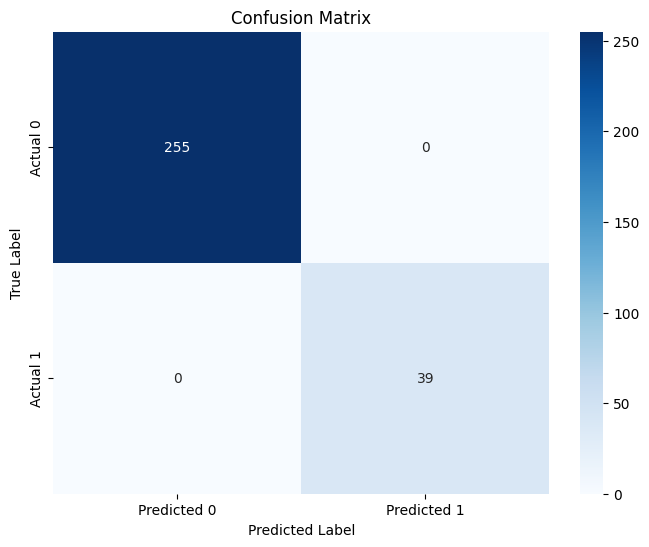

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined from previous code

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Explain Model Predictions using SHAP**

In [8]:
# Install SHAP if needed
!pip install shap


<Figure size 640x480 with 0 Axes>

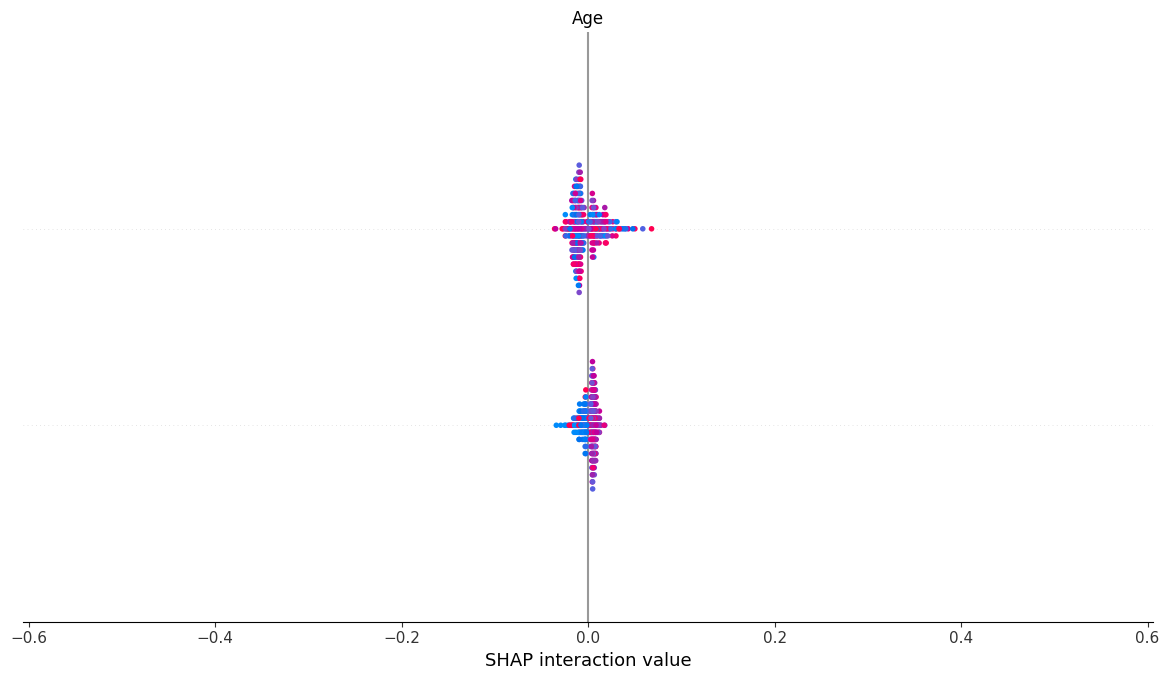

DimensionError: Length of features is not equal to the length of shap_values!

In [20]:
import shap

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Visualize the first prediction's explanation (force plot)
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

# Create a dependence plot to understand the relationship between a feature and the prediction
shap.dependence_plot("Age", shap_values[1], X_test) # Replace 'Age' with any feature name from your dataset

# **Provide Insights & Recommendations**

After analyzing feature importance, HR can take action to **reduce attrition** based on key factors like:

**Work-Life Balance:** Improve work-life balance policies.

**OverTime:** Reduce excessive overtime work.

**Salary Growth:** Offer better salary hikes to retain employees.

**Job Satisfaction:** Conduct employee satisfaction surveys.